# __Analisis de alquileres de propiedades a corto plazo__

## Entendiendo el problema

Se trata de un algoritmo capaz de analizar las caracteristicas de una propiedad como comodidades, tamano, ocupacion del espacio en un periodo determinado y sugerir al anfrition un precio a cobrar por tarifas diarias que garantice ganancias en momentos de alta demanda.

## Importar librerias

In [56]:
import pandas as pd

## Cargar datos

In [57]:
df = pd.read_json('./data_in/datos_hosting.json')
df.head()

,info_inmuebles
0,"{'evaluacion_general': '10.0', 'experiencia_lo..."
1,"{'evaluacion_general': '10.0', 'experiencia_lo..."
2,"{'evaluacion_general': '10.0', 'experiencia_lo..."
3,"{'evaluacion_general': '10.0', 'experiencia_lo..."
4,"{'evaluacion_general': '10.0', 'experiencia_lo..."


Vamos a normalizar el dataframe para darle un mejor formato a los datos json.

In [58]:
datos = pd.json_normalize(df['info_inmuebles'])
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,[This clean and comfortable one bedroom sits r...,[Lower Queen Anne is near the Seattle Center (...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[Real Bed, Futon, Futon, Pull-out Sofa, Real B...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$0, $0, $0, $0, $0, $350.00, $350.00, $350.00...","[$0, $0, $0, $20.00, $15.00, $28.00, $35.00, $...","[$110.00, $45.00, $55.00, $52.00, $85.00, $50...."
1,10.0,--,10,[Welcome to the heart of the 'Ballard Brewery ...,"[--, Capital Hill is the heart of Seattle, bor...","[2, 3, 2, 3, 3, 3, 2, 1, 2, 2, 2]","[3, 4, 2, 3, 3, 3, 3, 3, 3, 4, 3]","[5, 6, 8, 3, 3, 5, 4, 5, 6, 7, 4]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$500.00, $300.00, $0, $300.00, $300.00, $360....","[$125.00, $100.00, $85.00, $110.00, $110.00, $...","[$350.00, $300.00, $425.00, $300.00, $285.00, ..."
2,10.0,--,11,[New modern house built in 2013. Spectacular ...,[Upper Queen Anne is a charming neighborhood f...,[4],[5],[7],[Real Bed],"[{TV,""Cable TV"",Internet,""Wireless Internet"",""...","[$1,000.00]",[$300.00],[$975.00]
3,10.0,--,12,[Our NW style home is 3200+ sq ft with 3 level...,[The Views from our top floor! Wallingford ha...,"[3, 3, 3, 3, 3, 3, 3, 3]","[6, 6, 5, 5, 5, 5, 4, 4]","[6, 6, 7, 8, 7, 7, 6, 6]","[Real Bed, Real Bed, Real Bed, Real Bed, Real ...","[{Internet,""Wireless Internet"",Kitchen,""Free P...","[$500.00, $500.00, $500.00, $500.00, $500.00, ...","[$225.00, $300.00, $250.00, $250.00, $250.00, ...","[$490.00, $550.00, $350.00, $350.00, $350.00, ..."
4,10.0,--,14,"[Perfect for groups. 2 bedrooms, full bathroom...",[Safeway grocery store within walking distance...,"[2, 3]","[2, 6]","[3, 9]","[Real Bed, Real Bed]","[{TV,Internet,""Wireless Internet"",Kitchen,""Fre...","[$300.00, $2,000.00]","[$40.00, $150.00]","[$200.00, $545.00]"


## Contexto de los datos

Para avanzar en nuestros estudios sobre los datos proporcionados, vamos a entenderer qué información trae cada columna.

- __evaluacion_general__: se refiere a la puntuación media otorgada para evaluar el alojamiento en la propiedad.

- __experiencia_local__: describe las experiencias ofrecidas durante su estancia en la propiedad.

- __max_hospedes__: informa el número máximo de invitados que permite la ubicación.

- __descripcion_local__: describe la propiedad.

- __descripcion_vecindad__: describe el vecindario alrededor de la propiedad.

- __cantidad_baños__: informa el número de baños disponibles.

- __cantidad_cuartos__: informa el número de habitaciones disponibles.

- __cantidad_camas__: informa el número de camas disponibles.

- __modelo_cama__: informa el modelo de cama ofrecido.

- __comodidades__: informa las comodidades que ofrece la propiedad.

- __cuota_deposito__: informa la tarifa mínima de depósito para la seguridad del hosting.

- __cuota_limpieza__: informa el cargo cobrado por el servicio de limpieza.

- __precio__: se refiere al precio base a cobrar por la estancia diaria en la propiedad.

## Formateo de los datos

In [59]:
# obtener los nombres de las variables
columnas = list(datos.columns)
columnas

['evaluacion_general',
 'experiencia_local',
 'max_hospedes',
 'descripcion_local',
 'descripcion_vecindad',
 'cantidad_baños',
 'cantidad_cuartos',
 'cantidad_camas',
 'modelo_cama',
 'comodidades',
 'cuota_deposito',
 'cuota_limpieza',
 'precio']

> Visualizamos que a partir de la variable descripcion local en adelante los datos se presentan como listas, por lo que hay que formatear dichas variables.

> En la lista anterior, se inicia desde la posicion 3 hasta el resto de variables

In [60]:
datos = datos.explode(columnas[3:])
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
0,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
0,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
0,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
0,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


> La variable 'comodidades' es la unica que queda con formato de diccionario, debemos tenerlo en cuenta.

> El nuevo dataframe presenta indices repetidos por lo que debemos formatearlo de forma que no se repitan.

In [61]:
# resetear indice
datos.reset_index(inplace=True, drop=True)
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$0,$110.00
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$45.00
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",$0,$0,$55.00
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",$0,$20.00,$52.00
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",$0,$15.00,$85.00


In [62]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   object
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   object
 6   cantidad_cuartos      3818 non-null   object
 7   cantidad_camas        3818 non-null   object
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: object(13)
memory usage: 387.9+ KB


> Aumento la cantidad de registros debido al formateo de los datos.

> Todas la variables son de tipo 'object' lo cual es un problema.

> No se presentan valores faltantes en las variables

## Cambiar tipo de datos numerico

In [63]:
# importar libreria para manipular datos numericos
import numpy as np

In [64]:
# convertir variable 'max_hospedes' a entero
datos['max_hospedes'] = datos['max_hospedes'].astype(np.int64)

> Es importante que antes de hacer la conversion del tipo de dato, verifiques que los valores de la variable sean del mismo tipo ya que un valor de tipo diferente generara un error.

In [65]:
# identificar variables numericas enteras
col_enteras = ['cantidad_baños', 'cantidad_cuartos', 'cantidad_camas']

# cambiar el tipo de dato de varias variables al mismo tiempo
datos[col_enteras] = datos[col_enteras].astype(np.int64)

# verificar que los cambios han sido correctos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   evaluacion_general    3818 non-null   object
 1   experiencia_local     3818 non-null   object
 2   max_hospedes          3818 non-null   int64 
 3   descripcion_local     3818 non-null   object
 4   descripcion_vecindad  3818 non-null   object
 5   cantidad_baños        3818 non-null   int64 
 6   cantidad_cuartos      3818 non-null   int64 
 7   cantidad_camas        3818 non-null   int64 
 8   modelo_cama           3818 non-null   object
 9   comodidades           3818 non-null   object
 10  cuota_deposito        3818 non-null   object
 11  cuota_limpieza        3818 non-null   object
 12  precio                3818 non-null   object
dtypes: int64(4), object(9)
memory usage: 387.9+ KB


In [66]:
# convertir variable 'evaluacion_general' a flotante
datos['evaluacion_general'] = datos['evaluacion_general'].astype(np.float64)

Vamos a convertir los valores de 'precio', que es de tipo string, a tipo numerico omitiendo el signo de dolar.

In [67]:
datos['precio']

0       $110.00
1        $45.00
2        $55.00
3        $52.00
4        $85.00
         ...   
3813    $299.00
3814    $199.00
3815    $400.00
3816    $250.00
3817    $350.00
Name: precio, Length: 3818, dtype: object

In [68]:
# aplicar funcion lambda que elimine el simbolo de dolar y comas a los valores  
# quitar los espacios en blanco
datos['precio'] = datos['precio'].apply(lambda x: x.replace('$','').replace(',','').strip())

In [69]:
# verificar que los cambios se han hecho
datos['precio'][:5]

0    110.00
1     45.00
2     55.00
3     52.00
4     85.00
Name: precio, dtype: object

In [70]:
# cambiar el tipo de dato a float
datos['precio'] = datos['precio'].astype(np.float64)

# verificar cambio
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   object 
 11  cuota_limpieza        3818 non-null   object 
 12  precio                3818 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 387.9+ KB


Vemos que las variables 'cuota_deposito' y 'cuota_limpieza' tambien requieren cambiar el tipo de dato a numerico. Vamos hacer estos cambios en las dos variables al mismo tiempo.

In [71]:
datos[['cuota_deposito', 'cuota_limpieza']]

,cuota_deposito,cuota_limpieza
0,$0,$0
1,$0,$0
2,$0,$0
3,$0,$20.00
4,$0,$15.00
...,...,...
3813,"$1,000.00",$178.00
3814,$0,$99.00
3815,$0,$0
3816,"$1,000.00",$150.00


In [72]:
# aplicar funcion lambda que elimine el simbolo de dolar y comas a los valores  
# quitar los espacios en blanco
datos[['cuota_deposito', 'cuota_limpieza']] = datos[['cuota_deposito', 'cuota_limpieza']].applymap(lambda x: x.replace('$','').replace(',','').strip())

datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0,0,110.0
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0,0,45.0
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0,0,55.0
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0,20.00,52.0
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0,15.00,85.0


In [73]:
# convertir tipo de dato a float
datos[['cuota_deposito', 'cuota_limpieza']] = datos[['cuota_deposito', 'cuota_limpieza']].astype(np.float64)

# verificar cambios
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   evaluacion_general    3162 non-null   float64
 1   experiencia_local     3818 non-null   object 
 2   max_hospedes          3818 non-null   int64  
 3   descripcion_local     3818 non-null   object 
 4   descripcion_vecindad  3818 non-null   object 
 5   cantidad_baños        3818 non-null   int64  
 6   cantidad_cuartos      3818 non-null   int64  
 7   cantidad_camas        3818 non-null   int64  
 8   modelo_cama           3818 non-null   object 
 9   comodidades           3818 non-null   object 
 10  cuota_deposito        3818 non-null   float64
 11  cuota_limpieza        3818 non-null   float64
 12  precio                3818 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 387.9+ KB


## Tratamiento de datos de texto

In [74]:
datos.head()

,evaluacion_general,experiencia_local,max_hospedes,descripcion_local,descripcion_vecindad,cantidad_baños,cantidad_cuartos,cantidad_camas,modelo_cama,comodidades,cuota_deposito,cuota_limpieza,precio
0,10.0,--,1,This clean and comfortable one bedroom sits ri...,Lower Queen Anne is near the Seattle Center (s...,1,1,1,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,0.0,110.0
1,10.0,--,1,Our century old Upper Queen Anne house is loca...,"Upper Queen Anne is a really pleasant, unique ...",1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,45.0
2,10.0,--,1,Cozy room in two-bedroom apartment along the l...,The convenience of being in Seattle but on the...,1,1,1,Futon,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",0.0,0.0,55.0
3,10.0,--,1,Very lovely and cozy room for one. Convenientl...,"Ballard is lovely, vibrant and one of the most...",1,1,1,Pull-out Sofa,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",0.0,20.0,52.0
4,10.0,--,1,The “Studio at Mibbett Hollow' is in a Beautif...,--,1,1,1,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",0.0,15.0,85.0


In [75]:
# datos de la variable descripcion_local
datos['descripcion_local']

0       This clean and comfortable one bedroom sits ri...
1       Our century old Upper Queen Anne house is loca...
2       Cozy room in two-bedroom apartment along the l...
3       Very lovely and cozy room for one. Convenientl...
4       The “Studio at Mibbett Hollow' is in a Beautif...
                              ...                        
3813    Beautiful craftsman home in the historic Wedgw...
3814    Located in a very easily accessible area of Se...
3815    This home is fully furnished and available wee...
3816    This business-themed modern home features:  *H...
3817    This welcoming home is in the quiet residentia...
Name: descripcion_local, Length: 3818, dtype: object

In [76]:
# convertir strings a minuscula
datos['descripcion_local'] = datos['descripcion_local'].str.lower()

datos['descripcion_local']

0       this clean and comfortable one bedroom sits ri...
1       our century old upper queen anne house is loca...
2       cozy room in two-bedroom apartment along the l...
3       very lovely and cozy room for one. convenientl...
4       the “studio at mibbett hollow' is in a beautif...
                              ...                        
3813    beautiful craftsman home in the historic wedgw...
3814    located in a very easily accessible area of se...
3815    this home is fully furnished and available wee...
3816    this business-themed modern home features:  *h...
3817    this welcoming home is in the quiet residentia...
Name: descripcion_local, Length: 3818, dtype: object

Ahora, procedemos a eliminar caracteres especiales de los texto utilizando expresiones regulares

In [77]:
# examinar un registro especifico
datos['descripcion_local'][3169]

"built, run and supported by seattle tech and start up veterans, grokhome's focus is to create a supportive environment for smart people working on interesting projects, start ups and more. this listing is an upper bunk, in a 2-person shared room. *note: this fall, there will be major renovations happening on one kitchen and bathroom at a time. there will always be two other working kitchens and two working bathrooms in the house. we'll work to minimize the impact these renovations have on your stay. **this listing is only available to those working in the tech/science space. live in a hacker house, and immerse yourself in the seattle tech scene. you can expect to be surrounded by smart people solving big problems or working on something fun. we have frequent demo nights, and love when our guests share something they are passionate about. if you're new to the city, our deep ties to the seattle tech scene can help you get involved. expand your network, develop your ideas, and learn some

In [78]:
# dejar solo letras minusculas, mayusculas, numeros, guion y comilla simple en el texto
datos['descripcion_local'] = datos['descripcion_local'].str.replace('[^a-zA-Z0-9\-\']',' ',regex=True)
datos['descripcion_local']

0       this clean and comfortable one bedroom sits ri...
1       our century old upper queen anne house is loca...
2       cozy room in two-bedroom apartment along the l...
3       very lovely and cozy room for one  convenientl...
4       the  studio at mibbett hollow' is in a beautif...
                              ...                        
3813    beautiful craftsman home in the historic wedgw...
3814    located in a very easily accessible area of se...
3815    this home is fully furnished and available wee...
3816    this business-themed modern home features    h...
3817    this welcoming home is in the quiet residentia...
Name: descripcion_local, Length: 3818, dtype: object

In [79]:
# eliminar guion entre palabras: one - shot
datos['descripcion_local'] = datos['descripcion_local'].str.replace('(?<!\w)-(?!\w)',' ',regex=True)
datos['descripcion_local']

0       this clean and comfortable one bedroom sits ri...
1       our century old upper queen anne house is loca...
2       cozy room in two-bedroom apartment along the l...
3       very lovely and cozy room for one  convenientl...
4       the  studio at mibbett hollow' is in a beautif...
                              ...                        
3813    beautiful craftsman home in the historic wedgw...
3814    located in a very easily accessible area of se...
3815    this home is fully furnished and available wee...
3816    this business-themed modern home features    h...
3817    this welcoming home is in the quiet residentia...
Name: descripcion_local, Length: 3818, dtype: object

## Tokenizacion de las palabras

Consiste en dividir las frases en listas de palabras. Vamos a aplicarlo sobre las descripciones para luego, con un proceso de Machine Learning, identificar las palabras mas relevantes sobre el precio final.

In [80]:
datos['descripcion_local'] = datos['descripcion_local'].str.split()
datos['descripcion_local']

0       [this, clean, and, comfortable, one, bedroom, ...
1       [our, century, old, upper, queen, anne, house,...
2       [cozy, room, in, two-bedroom, apartment, along...
3       [very, lovely, and, cozy, room, for, one, conv...
4       [the, studio, at, mibbett, hollow', is, in, a,...
                              ...                        
3813    [beautiful, craftsman, home, in, the, historic...
3814    [located, in, a, very, easily, accessible, are...
3815    [this, home, is, fully, furnished, and, availa...
3816    [this, business-themed, modern, home, features...
3817    [this, welcoming, home, is, in, the, quiet, re...
Name: descripcion_local, Length: 3818, dtype: object

La variable 'comodidades' presenta una agrupacion de palabras dentro de un diccionario. Vamos a usar regex para eliminar las llaves y caracteres especiales y de esta forma, tener la informacion mejor estructurada

In [81]:
datos['comodidades'] = datos['comodidades'].str.replace('\{|}|\"','', regex=True)
datos['comodidades']

0       Internet,Wireless Internet,Kitchen,Free Parkin...
1       TV,Internet,Wireless Internet,Kitchen,Free Par...
2       TV,Internet,Wireless Internet,Kitchen,Free Par...
3       Internet,Wireless Internet,Kitchen,Free Parkin...
4       Wireless Internet,Kitchen,Free Parking on Prem...
                              ...                        
3813    TV,Cable TV,Internet,Wireless Internet,Air Con...
3814    TV,Cable TV,Internet,Wireless Internet,Kitchen...
3815    TV,Cable TV,Internet,Wireless Internet,Air Con...
3816    TV,Cable TV,Internet,Wireless Internet,Air Con...
3817    TV,Internet,Wireless Internet,Kitchen,Free Par...
Name: comodidades, Length: 3818, dtype: object

Ahora, volvamos listas cada valor de 'comodidades' para crear la estructura de tokenizacion

In [82]:
datos['comodidades'] = datos['comodidades'].str.split(',')
datos['comodidades']

0       [Internet, Wireless Internet, Kitchen, Free Pa...
1       [TV, Internet, Wireless Internet, Kitchen, Fre...
2       [TV, Internet, Wireless Internet, Kitchen, Fre...
3       [Internet, Wireless Internet, Kitchen, Free Pa...
4       [Wireless Internet, Kitchen, Free Parking on P...
                              ...                        
3813    [TV, Cable TV, Internet, Wireless Internet, Ai...
3814    [TV, Cable TV, Internet, Wireless Internet, Ki...
3815    [TV, Cable TV, Internet, Wireless Internet, Ai...
3816    [TV, Cable TV, Internet, Wireless Internet, Ai...
3817    [TV, Internet, Wireless Internet, Kitchen, Fre...
Name: comodidades, Length: 3818, dtype: object

## Respondiendo preguntas de negocio

### __Cual es el rango de precios que se cobra por dia?__

In [83]:
rango_precio = datos['precio'].agg(['min', 'max', 'mean', 'median'])
rango_precio

min         20.000000
max       1000.000000
mean       127.976166
median     100.000000
Name: precio, dtype: float64

> La mayoria de alojamientos cobran cerca de 100$ por lo que es un buen punto de referencia competitivo.

> El promedio es mas alto que la mediana (128 > 100) lo que sugiere la presencia de algunos alojamientos con precios muy altos. El valor maximo indica la presencia de un valor atipico de 1000$

> Para cobrar mas de 100$ debe ofrecer mas valor para justificarlo: ubicacion, comodidades destacadas, buena puntuacion, entre otros.

> Cobrar por debajo de 100$ puede ser estrategico en ciertas temporadas o si estas empezando el negocio. Esto ayudaria a ganar evaluaciones positivas.

> El precio minimo es de 20$, valor muy bajo respecto a la media lo que podria dar mala imagen o generar perdidas.



### __¿Qué relación hay entre el precio y la evaluación general?__

In [84]:
datos['evaluacion_general'].unique()

array([10.,  2.,  4.,  5.,  6.,  7.,  8.,  9., nan])

In [85]:
# Veamos la estadistica descriptiva de ambas variables
datos[['precio', 'evaluacion_general']].describe()

,precio,evaluacion_general
count,3818.000000,3162.000000
mean,127.976166,9.452245
std,90.250022,0.750259
min,20.000000,2.000000
25%,75.000000,9.000000
50%,100.000000,10.000000
75%,150.000000,10.000000
max,1000.000000,10.000000


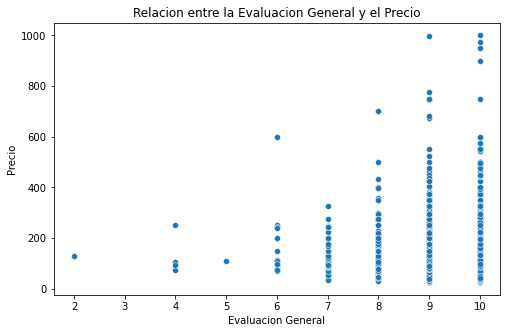

In [86]:
# librerias de visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# grafico de dispersion entre ambas variables
plt.figure(figsize=(8,5))
sns.scatterplot(data=datos, x='evaluacion_general', y='precio')
plt.title('Relacion entre la Evaluacion General y el Precio')
plt.xlabel('Evaluacion General')
plt.ylabel('Precio')
plt.show()

## Datos de tiempo

Tenemos una base de datos adicional que contiene los lugares disponibles en varios inmuebles de alojamiento durante el ano 2016.

In [87]:
dt_data = pd.read_json('./data_in/inmuebles_disponibles.json')
dt_data.head()

,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None


In [88]:
# tipo de datos del dataframe
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                365000 non-null  int64 
 1   fecha             365000 non-null  object
 2   lugar_disponible  365000 non-null  bool  
 3   precio            270547 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 11.5+ MB


> La variable 'precio' presenta valores faltantes.

> La variable 'fecha' no se encuentra en el formato correcto, por lo que debemos modificarlo.

In [89]:
# convertir variable fecha a tipo datetime64
dt_data['fecha'] = pd.to_datetime(dt_data['fecha'])
dt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365000 entries, 0 to 364999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                365000 non-null  int64         
 1   fecha             365000 non-null  datetime64[ns]
 2   lugar_disponible  365000 non-null  bool          
 3   precio            270547 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(1)
memory usage: 11.5+ MB


## Respondiendo preguntas de negocio

### __1. Cuantos lugares disponibles habian por mes?__

In [90]:
# mostrar primeros 5 registros
dt_data.head()

,id,fecha,lugar_disponible,precio
0,857,2016-01-04,False,None
1,857,2016-01-05,False,None
2,857,2016-01-06,False,None
3,857,2016-01-07,False,None
4,857,2016-01-08,False,None


In [91]:
# convertir formato de fecha a ano-mes
dt_data['fecha'].dt.strftime('%Y-%m')

0         2016-01
1         2016-01
2         2016-01
3         2016-01
4         2016-01
           ...   
364995    2016-12
364996    2016-12
364997    2016-12
364998    2017-01
364999    2017-01
Name: fecha, Length: 365000, dtype: object

In [92]:
subset = dt_data.groupby(dt_data['fecha'].dt.strftime('%Y-%m'))['lugar_disponible'].sum()
subset

fecha
2016-01    16543
2016-02    20128
2016-03    23357
2016-04    22597
2016-05    23842
2016-06    23651
2016-07    22329
2016-08    22529
2016-09    22471
2016-10    23765
2016-11    23352
2016-12    24409
2017-01     1574
Name: lugar_disponible, dtype: int64